In [1]:
import pandas as pd
import numpy as np
from src import Data_analysis_tools as Tools
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
features = Tools.load_pickle('./ml_models/features_for_prediction_new')

data = pd.read_csv('validation_data_first_half_2015_2021.csv', index_col=0)

# Pre processing

In [3]:
traduction = {
        'W': 1,
        'L': 0
        }

data['W/L_Home'] = data['W/L_Home'].map(traduction)

X = data[features]


assert not(X.isnull().values.any()), 'Nan Values in data'

case = np.isinf(X).values.sum()
assert case is not None, 'Inf Values in data'

X = np.array(X)
y = np.array(data['W/L_Home'])
print(f'Initial dimensions: {X.shape[1]}')
# pca = PCA(n_components='mle')
# X = pca.fit_transform(X)
# print(f'Dimensions after PCA: {X.shape[1]}')

n_inputs = X.shape[-1]


Initial dimensions: 171


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# DL Architectures

In [5]:
# from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras import models

model = models.Sequential()
model.add(layers.Flatten(input_shape=(X.shape[1],)))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dropout(0.7))
model.add(layers.Dense(2056, activation='relu'))
# model.add(layers.Dense(2056, activation='relu'))
# model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dropout(0.9))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 171)               0         
_________________________________________________________________
dense (Dense)                (None, 2056)              353632    
_________________________________________________________________
dropout (Dropout)            (None, 2056)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2057      
Total params: 355,689
Trainable params: 355,689
Non-trainable params: 0
_________________________________________________________________


In [6]:
metric = 'acc'

In [7]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=[metric])

history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/100
177/177 [==============================] - 1s 3ms/step - loss: 0.6503 - acc: 0.6530 - val_loss: 0.5223 - val_acc: 0.7355
Epoch 2/100
177/177 [==============================] - 0s 3ms/step - loss: 0.5898 - acc: 0.7052 - val_loss: 0.5197 - val_acc: 0.7369
Epoch 3/100
177/177 [==============================] - 0s 3ms/step - loss: 0.5711 - acc: 0.7091 - val_loss: 0.5184 - val_acc: 0.7404
Epoch 4/100
177/177 [==============================] - 0s 3ms/step - loss: 0.5646 - acc: 0.7113 - val_loss: 0.5166 - val_acc: 0.7373
Epoch 5/100
177/177 [==============================] - 0s 3ms/step - loss: 0.5573 - acc: 0.7148 - val_loss: 0.5158 - val_acc: 0.7383
Epoch 6/100
177/177 [==============================] - 0s 3ms/step - loss: 0.5461 - acc: 0.7222 - val_loss: 0.5149 - val_acc: 0.7404
Epoch 7/100
177/177 [==============================] - 0s 3ms/step - loss: 0.5404 - acc: 0.7253 - val_loss: 0.5154 - val_acc: 0.7387
Epoch 8/100
177/177 [==============================] - 0s 3ms/step - 

177/177 [==============================] - 0s 2ms/step - loss: 0.5124 - acc: 0.7441 - val_loss: 0.5145 - val_acc: 0.7408
Epoch 63/100
177/177 [==============================] - 0s 2ms/step - loss: 0.5141 - acc: 0.7420 - val_loss: 0.5146 - val_acc: 0.7373
Epoch 64/100
177/177 [==============================] - 0s 2ms/step - loss: 0.5157 - acc: 0.7437 - val_loss: 0.5140 - val_acc: 0.7383
Epoch 65/100
177/177 [==============================] - 0s 3ms/step - loss: 0.5106 - acc: 0.7448 - val_loss: 0.5144 - val_acc: 0.7387
Epoch 66/100
177/177 [==============================] - 0s 2ms/step - loss: 0.5121 - acc: 0.7465 - val_loss: 0.5150 - val_acc: 0.7355
Epoch 67/100
177/177 [==============================] - 0s 3ms/step - loss: 0.5118 - acc: 0.7461 - val_loss: 0.5139 - val_acc: 0.7387
Epoch 68/100
177/177 [==============================] - 0s 3ms/step - loss: 0.5115 - acc: 0.7437 - val_loss: 0.5146 - val_acc: 0.7411
Epoch 69/100
177/177 [==============================] - 0s 3ms/step - loss:

In [8]:
from sklearn.metrics import confusion_matrix
y_proba_nn = model.predict(X_test)
cond = y_proba_nn >= 0.5
y_pred_nn = np.where(cond,1,0)
print(f'\nf1_score nn: {Tools.f1_eval(y_pred_nn, y_test)}\n')
print(confusion_matrix(y_test, y_pred_nn))


f1_score nn: 0.7332624867162594

[[1036  403]
 [ 350 1035]]


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


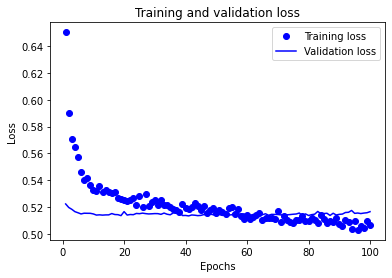

In [9]:
import matplotlib.pyplot as plt
history_dict = history.history
print(history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict[metric.lower()]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

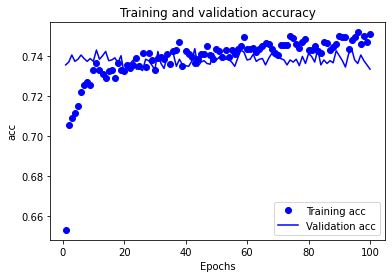

In [10]:
plt.clf() 
acc_values = history_dict[metric.lower()] 
val_acc_values = history_dict[f'val_{metric.lower()}']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel(f'{metric.lower()}')
plt.legend()

# Post Process

In [11]:
validation_data = pd.read_csv('validation_data_first_half_2008_2015.csv', index_col=0)

In [12]:
assert not(validation_data[features].isnull().values.any()), 'Nan Values in data'
case = np.isinf(validation_data[features]).values.sum()
assert case is not None, 'Inf Values in data'
X_val = np.array(validation_data[features])
# X_val = pca.transform(X_val)
X_val = scaler.transform(X_val)
y_val = validation_data['W/L_Home'].map(traduction)

In [13]:
keras_proba = model.predict(X_val)
validation_data['keras_proba'] = keras_proba
cond = keras_proba >= 0.5
keras_pred = np.where(cond,1,0)
validation_data['keras_pred'] = keras_pred

In [14]:
print(f'\nf1_score nn: {Tools.f1_eval(keras_pred, y_val)}\n')
print(confusion_matrix(y_val, keras_pred))


f1_score nn: 0.729063465236902

[[5834 2535]
 [2114 6255]]


In [15]:
# knn_proba = knn.predict_proba(X_val)
# validation_data['knn_proba'] = knn_proba.max(axis=1)

In [16]:
imap = {
        1: 'W',
        0: 'L'
        }

validation_data['keras_pred'] = validation_data['keras_pred'].map(imap)
# validation_data['knn_pred'] = validation_data['knn_pred'].map(imap)

In [17]:
validation_data = validation_data[['TEAM_Home', 'TEAM_Away', 'DATE_Home', 'keras_pred', 'keras_proba', 'W/L_Home']]


In [26]:
mask = (validation_data['keras_pred'] == 'W') 
pp1 = validation_data[mask]
pp1

,TEAM_Home,TEAM_Away,DATE_Home,keras_pred,keras_proba,W/L_Home
0,ORL,MIN,01/01/2010,W,0.746976,W
1,ATL,NYK,01/01/2010,W,0.701113,L
4,SAC,LAL,01/01/2010,W,0.833547,L
6,SAS,OKC,01/01/2011,W,0.899240,W
9,UTA,MEM,01/01/2011,W,0.895594,W
...,...,...,...,...,...,...
16729,OKC,PHX,12/31/2014,W,0.839262,W
16730,MIA,IND,12/31/2014,W,0.636956,L
16731,LAC,NYK,12/31/2014,W,0.937058,W
16732,SAS,NOP,12/31/2014,W,0.936978,W


In [27]:
mask = (validation_data['keras_pred'] == validation_data['W/L_Home'])
pp2 = pp1[mask]
pp2

<ipython-input-27-ad71cefb36a0>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,TEAM_Home,TEAM_Away,DATE_Home,keras_pred,keras_proba,W/L_Home
0,ORL,MIN,01/01/2010,W,0.746976,W
6,SAS,OKC,01/01/2011,W,0.899240,W
9,UTA,MEM,01/01/2011,W,0.895594,W
11,DEN,SAC,01/01/2011,W,0.913455,W
14,MIL,DAL,01/01/2011,W,0.808182,W
...,...,...,...,...,...,...
16728,MIL,CLE,12/31/2014,W,0.717767,W
16729,OKC,PHX,12/31/2014,W,0.839262,W
16731,LAC,NYK,12/31/2014,W,0.937058,W
16732,SAS,NOP,12/31/2014,W,0.936978,W


In [28]:
from sklearn.cluster import KMeans
def print_data(data,model_prob):
    print('Cluster ',data["clusters"].unique()[0])
    print(data[model_prob].values.min())
    print(data[model_prob].values.max()) 
    
def get_accuracy(data, model_pred):
    mask = data[model_pred] == data['W/L_Home']
    data2 = data[mask]
    accuracy = data2.shape[0]/data.shape[0]
    data['Accuracy'] = accuracy
    data['n_matches'] = data.shape[0]
    if accuracy >= 1:
        print('Cluster ',data["clusters"].unique()[0])
        print (f'Total matches: {data.shape[0]}')
        print (f'Lost matches: {data.shape[0]-data2.shape[0]}')
    return data
  
X = np.array(pp1['keras_proba']).reshape(-1, 1)
kmeans= KMeans(n_clusters=100, random_state=0)
pp1['clusters'] = kmeans.fit_predict(X)

pp1 = pp1.groupby(['clusters']).apply(get_accuracy, 'keras_pred')  
pp1.sort_values(by=['Accuracy'], inplace=True)

<ipython-input-28-1b62ca79725c>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Cluster  8
Total matches: 79
Lost matches: 0
Cluster  20
Total matches: 45
Lost matches: 0
Cluster  52
Total matches: 71
Lost matches: 0
Cluster  67
Total matches: 63
Lost matches: 0
Cluster  83
Total matches: 66
Lost matches: 0
Cluster  88
Total matches: 71
Lost matches: 0
Cluster  93
Total matches: 40
Lost matches: 0


In [29]:
import plotly.express as px
df_plot = pp1.groupby('clusters').head(1)
fig = px.bar(df_plot, x="clusters", y="Accuracy")
fig.show()
print(len(pp1['clusters'].unique()))

100


In [30]:
df_plot.sort_values(by=['Accuracy'], ascending=False, inplace=True)
cond = df_plot['Accuracy'] >= 1.
res = df_plot[cond]

/Users/dimitrisglenis/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
print(res['n_matches'].sum())

435


In [24]:
display(res)
print(res['clusters'].unique())


,TEAM_Home,TEAM_Away,DATE_Home,keras_pred,keras_proba,W/L_Home,clusters,Accuracy,n_matches
8209,DET,MIA,03/23/2012,L,0.025520,L,86,1.0,52
5379,PHI,MIL,02/24/2014,L,0.015507,L,85,1.0,50
5091,LAC,POR,02/22/2009,L,0.017397,L,47,1.0,57
5093,DET,CLE,02/22/2009,L,0.003737,L,95,1.0,35
5112,ATL,LAL,02/22/2011,L,0.045179,L,27,1.0,81
13983,WAS,TOR,12/01/2010,L,0.029883,L,21,1.0,70
14118,NYK,CLE,12/03/2008,L,0.009567,L,9,1.0,35


[86 85 47 95 27 21  9]


# Save the models


In [25]:
save = True
if save:
    
    # keras model
   
    model.save('keras_model_new.h5')

    # scaler
    name_scaler = 'keras_scaler_new'
    Tools.save_pickle(scaler, name_scaler)


    # clusterer
    name_clusterer = 'keras_clusterer_new'
    Tools.save_pickle(kmeans, name_clusterer)
